## HW3 Starter Code: 524 Spring 2023

In [41]:
using Pkg
Pkg.add("LinearAlgebra")
Pkg.add("HiGHS")

    Updating registry at `C:\Users\16084\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\16084\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\16084\.julia\environments\v1.8\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\16084\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\16084\.julia\environments\v1.8\Manifest.toml`


In [42]:
#Question 1
using JuMP, HiGHS

x = [0, 20, 18, 30, 35, 33, 5, 5, 11, 2]
y = [0, 20, 10, 12, 0, 25, 27, 10, 0, 15]

demand = [10, 6, 8, 11, 9, 7, 15, 7, 9, 12]
inventory = [8, 13, 4, 8, 12, 2, 14, 11, 15, 7]

n = length(demand) 

d = zeros(n, n)
for i in 1:n
    for j in 1:n
        d[i,j] = 1.3 * hypot(x[i]-x[j], y[i]-y[j])
    end
end

model = Model(HiGHS.Optimizer)

@variable(model, x[i=1:n, j=1:n], lower_bound=0)

@objective(model, Min, sum(d[i,j]*x[i,j] for i=1:n, j=1:n))

@constraint(model, [i=1:n], sum(x[i,j] for j=1:n) == demand[i])
@constraint(model, [j=1:n], sum(x[i,j] for i=1:n) == inventory[j])

optimize!(model)

println("Miles：", objective_value(model))

println("The ways to transport：")
for i in 1:n
    for j in 1:n
        if value(x[i,j]) > 0
            println("From agency $i to agency $j ：", value(x[i,j]), " cars")
        end
    end
end

println("Minimum total cost: ", objective_value(model)*0.5)


Running HiGHS 1.4.2 [date: 1970-01-01, git hash: f797c1ab6]
Copyright (c) 2022 ERGO-Code under MIT licence terms
Presolving model
20 rows, 100 cols, 200 nonzeros
19 rows, 100 cols, 190 nonzeros
Presolve : Reductions: rows 19(-1); columns 100(-0); elements 190(-10)
Solving the presolved LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0     0.0000000000e+00 Pr: 19(175) 0s
         21     3.0527803265e+02 Pr: 0(0) 0s
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Simplex   iterations: 21
Objective value     :  3.0527803265e+02
HiGHS run time      :          0.00
Miles：305.27803264591256
The ways to transport：
From agency 1 to agency 1 ：8.0 cars
From agency 1 to agency 9 ：2.0 cars
From agency 2 to agency 2 ：6.0 cars
From agency 3 to agency 2 ：1.0 cars
From agency 3 to agency 3 ：4.0 cars
From agency 3 to agency 9 ：3.0 cars
From agency 4 to agency 4 ：8.0 cars
From agency 4 to agency 5 ：3.0 

## Q2 Data for Stadium Building Problem

(This is the data needed for part (b). Part (a) of the problem will not need all this data.)

In [43]:
using JuMP

tasks = 1:18
durations = [2 16 9 8 10 6 2 2 9 5 3 2 1 7 4 3 9 1]
predecessors = ( [], [1], [2], [2], [3], [4,5], [4], [6], [4,6], [4], [6], [9], [7], [2], [4,14], [8,11,14], [12], [17] )
pred_dict = Dict(zip(tasks,predecessors));   # dictionary mapping tasks --> predecessors.

# additional columns of data (maximum reduction possible )
max_reduction =  [0,  3,  1,  2,  2,  1, 1, 0,  2,  1,  1, 0, 0,  2,  2, 1,  3, 0]  # max reduction (in weeks)
cost_reduction = [0, 30, 26, 12, 17, 15, 8, 0, 42, 21, 18, 0, 0, 22, 12, 6, 16, 0]  # cost of reduction ($1,000/week)
bonus_amount = 30     # bonus for expediting the project ($1,000/week )
;
duration = Dict(zip(tasks,durations))
pred_dict

Dict{Int64, Vector} with 18 entries:
  5  => [3]
  16 => [8, 11, 14]
  7  => [4]
  12 => [9]
  8  => [6]
  17 => [12]
  1  => Any[]
  4  => [2]
  6  => [4, 5]
  13 => [7]
  2  => [1]
  10 => [4]
  11 => [6]
  9  => [4, 6]
  15 => [4, 14]
  18 => [17]
  14 => [2]
  3  => [2]

In [44]:
#Question 2 (a)
using JuMP, HiGHS

m = Model(HiGHS.Optimizer)

@variable(m, tstart[tasks])

for i in tasks
    for j in pred_dict[i]
        @constraint(m, tstart[i] >= tstart[j] + duration[j])
    end
end
@constraint(m, tstart[1] == 0)
@objective(m, Min, tstart[18] + duration[18])

optimize!(m)
println(value.(tstart))
println("minimum duration: ", objective_value(m))

Running HiGHS 1.4.2 [date: 1970-01-01, git hash: f797c1ab6]
Copyright (c) 2022 ERGO-Code under MIT licence terms
Presolving model
5 rows, 6 cols, 10 nonzeros
0 rows, 0 cols, 0 nonzeros
Presolve : Reductions: rows 0(-23); columns 0(-18); elements 0(-45) - Reduced to empty
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Objective value     :  6.4000000000e+01
HiGHS run time      :          0.00
1-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 1:18
And data, a 18-element Vector{Float64}:
 -0.0
  2.0
 18.0
 18.0
 27.0
 37.0
 26.0
 43.0
 43.0
 26.0
 43.0
 52.0
 28.0
 18.0
 26.0
 46.0
 54.0
 63.0
minimum duration: 64.0


In [45]:
#Question 2 (b)
dura=copy(durations)

for i in 1:length(max_reduction)
    if cost_reduction[i]<=30
        dura[i]=dura[i]-max_reduction[i]
    end
end

m = Model(HiGHS.Optimizer)

@variable(m, tstart[tasks])

for i in tasks
    for j in pred_dict[i]
        @constraint(m, tstart[i] >= tstart[j] + dura[j])
    end
end
@constraint(m, tstart[1] == 0)
@objective(m, Min, tstart[18] + dura[18])

optimize!(m)
println(value.(tstart))
println("minimum duration: ", objective_value(m))

Running HiGHS 1.4.2 [date: 1970-01-01, git hash: f797c1ab6]
Copyright (c) 2022 ERGO-Code under MIT licence terms
Presolving model
5 rows, 6 cols, 10 nonzeros
0 rows, 0 cols, 0 nonzeros
Presolve : Reductions: rows 0(-23); columns 0(-18); elements 0(-45) - Reduced to empty
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Objective value     :  5.4000000000e+01
HiGHS run time      :          0.00
1-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 1:18
And data, a 18-element Vector{Float64}:
 -0.0
  2.0
 15.0
 15.0
 23.0
 31.0
 21.0
 36.0
 36.0
 21.0
 36.0
 45.0
 22.0
 15.0
 21.0
 38.0
 47.0
 53.0
minimum duration: 54.0


## Q3 Starter Code for Battery Charge Problem

In [46]:
#Question 3 (a)
using JuMP, HiGHS

m = Model(HiGHS.Optimizer)

capacity = 30
demand = [43 40 36 36 35 38 41 46 49 48 47 47 48 46 45 47 50 63 75 75 72 66 57 50]

# Insert here your code to build the model and solve the problem

@variable(m, 15 >= extra[1:24] >= 0)
@variable(m, 50 >= purchased[1:24] >= 0)
@variable(m, 30 >= charge[0:24] >= 0)

@constraint(m, charge[0] == 0)
@constraint(m, [i in 1:24], demand[i] <= purchased[i] + extra[i] + charge[i-1])
@constraint(m, [i in 1:24], charge[i] <= purchased[i] + extra[i] + charge[i-1] - demand[i])

@objective(m, Min, sum(extra[1:24])*400 + sum(purchased[1:24])*100)

optimize!(m)
println("Total cost will be: \$", objective_value(m))

Running HiGHS 1.4.2 [date: 1970-01-01, git hash: f797c1ab6]
Copyright (c) 2022 ERGO-Code under MIT licence terms
Presolving model
48 rows, 71 cols, 165 nonzeros
40 rows, 60 cols, 135 nonzeros
38 rows, 58 cols, 130 nonzeros
Presolve : Reductions: rows 38(-11); columns 58(-15); elements 130(-39)
Solving the presolved LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0     0.0000000000e+00 Ph1: 0(0) 0s
         35     1.4340000000e+05 Pr: 0(0) 0s
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Simplex   iterations: 35
Objective value     :  1.4340000000e+05
HiGHS run time      :          0.00
Total cost will be: $143400.0


In [47]:
# add the plotting package Gadfly
using Pkg
Pkg.add("Gadfly")
Pkg.build

   Resolving package versions...
  No Changes to `C:\Users\16084\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\16084\.julia\environments\v1.8\Manifest.toml`


build (generic function with 7 methods)

### Q3 (b)

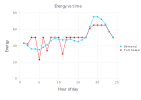

In [48]:
#Question 3 (b)
# this code will plot the demand (given in the starter code above) 
# and the value of the variable "purchased".
# Make sure the variable "purchased" is defined correctly by the code you write for part (a)
using Gadfly
plot(layer( x=1:24, y=demand, Geom.point, Geom.line ),
layer( x=1:24, y=(value.(extra) + value.(purchased)), Geom.point, Geom.line, Theme(default_color=colorant"red") ),
Guide.xlabel( "Hour of day"), Guide.ylabel("Energy"), Guide.title("Energy vs time"), Guide.manual_color_key("",["Demand", "Purchased"],
                            [Gadfly.current_theme().default_color, "red"]))

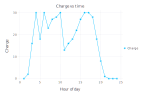

In [49]:
#Question 3 (c)
using Gadfly
plot(layer(x=1:24, y=(value.(charge)[1:24]) , Geom.point, Geom.line),
Guide.xlabel("Hour of day"), Guide.ylabel("Charge"), Guide.title("Charge vs time"), Guide.manual_color_key("", ["Charge"]))

In [50]:
#Question 3 (d)
m = Model(HiGHS.Optimizer)

demand = [43 40 36 36 35 38 41 46 49 48 47 47 48 46 45 47 50 63 75 75 72 66 57 50]

@variable(m, 15 >= extra[1:24] >= 0)
@variable(m, 50 >= purchased[1:24] >= 0)
@variable(m, charge[0:24] >= 0)

@constraint(m, charge[0] == 0)
@constraint(m, [i in 1:24], demand[i] <= purchased[i] + extra[i] + charge[i-1])
@constraint(m, [i in 1:24], charge[i] <= purchased[i] + extra[i] + charge[i-1] - demand[i])

@objective(m, Min, sum(extra[1:24])*400 + sum(purchased[1:24])*100)

optimize!(m)

for i in 1:24
    println(i, " hours ", value.(charge[i]), " charge stored.")
end

println("Total cost will be: \$", objective_value(m))

Running HiGHS 1.4.2 [date: 1970-01-01, git hash: f797c1ab6]
Copyright (c) 2022 ERGO-Code under MIT licence terms
Presolving model
48 rows, 71 cols, 165 nonzeros
37 rows, 59 cols, 138 nonzeros
37 rows, 59 cols, 138 nonzeros
Presolve : Reductions: rows 37(-12); columns 59(-14); elements 138(-31)
Solving the presolved LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0     0.0000000000e+00 Pr: 37(2206) 0s
         19     1.2000000000e+05 Pr: 0(0) 0s
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Simplex   iterations: 19
Objective value     :  1.2000000000e+05
HiGHS run time      :          0.00
1 hours 7.0 charge stored.
2 hours 17.0 charge stored.
3 hours 31.0 charge stored.
4 hours 45.0 charge stored.
5 hours 60.0 charge stored.
6 hours 72.0 charge stored.
7 hours 81.0 charge stored.
8 hours 85.0 charge stored.
9 hours 86.0 charge stored.
10 hours 88.0 charge stored.
11 hours 91.0 charge

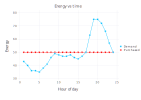

In [51]:
#Question 3 (e)
using Gadfly
plot(layer( x=1:24, y=demand, Geom.point, Geom.line ),
layer( x=1:24, y=(value.(extra) + value.(purchased)), Geom.point, Geom.line, Theme(default_color=colorant"red") ),
Guide.xlabel( "Hour of day"), Guide.ylabel("Energy"), Guide.title("Energy vs time"), Guide.manual_color_key("",["Demand", "Purchased"],
                            [Gadfly.current_theme().default_color, "red"]))

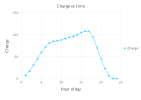

In [52]:
using Gadfly
plot(layer(x=1:24, y=(value.(charge)[1:24]) , Geom.point, Geom.line),
Guide.xlabel("Hour of day"), Guide.ylabel("Charge"), Guide.title("Charge vs time"), Guide.manual_color_key("", ["Charge"]))